In [1]:
!pip install  opencv-contrib-python

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os, types
from tqdm import tqdm

In [2]:
!rm -rvf /home/wsuser/work/*

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [3]:

from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_50a7155caffb463bbe56b5110e47f934 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_50a7155caffb463bbe56b5110e47f934 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_50a7155caffb463bbe56b5110e47f934 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mcSZ76JDfQX_lFcAF-E9rD82Dc2hdKZ_KnSeK1O2tJDB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_50a7155caffb463bbe56b5110e47f934)

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_50a7155caffb463bbe56b5110e47f934.get_object(Bucket='aiadventure-donotdelete-pr-klkuirqfacwqzj', Key='agri_data.zip')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


ModuleNotFoundError: No module named 'botocore'

In [ ]:

from io import BytesIO
import zipfile

unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [6]:
!ls  /home/wsuser/work/

data


# Converting text file into dataframe

In [4]:
path = 'data/'

In [5]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [6]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [7]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

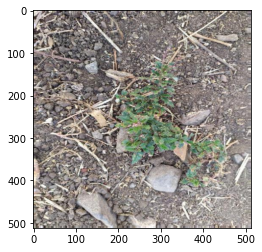

In [8]:
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [9]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    #print(id)
    file = open(id[:-5]+'.txt','r') 
    a = file.read()
    file.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        #df.loc[i,'image_name'] = id[78:]
        df.loc[i,'image_name']= os.path.basename(id)
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

100%|██████████████████████████████████████████████████████████████████████████████| 1300/1300 [00:26<00:00, 49.03it/s]


In [10]:
df

image_name object     x_cen     y_cen         w         h
0     agri_0_1009.jpeg      1  0.608398  0.498047  0.541016   0.53125
1     agri_0_1017.jpeg      1  0.496094  0.384766  0.960938  0.753906
2     agri_0_1018.jpeg      1  0.445312  0.483398  0.808594  0.634766
3     agri_0_1020.jpeg      1  0.494141  0.350586  0.730469  0.611328
4     agri_0_1024.jpeg      1  0.601562  0.448242  0.570312  0.595703
...                ...    ...       ...       ...       ...       ...
2067  agri_0_9963.jpeg      1  0.501953   0.40625  0.773438       0.5
2068  agri_0_9971.jpeg      1  0.266602   0.43457  0.357422  0.349609
2069  agri_0_9971.jpeg      1  0.272461   0.84668  0.341797  0.306641
2070  agri_0_9971.jpeg      1  0.713867  0.382812  0.365234  0.449219
2071  agri_0_9971.jpeg      1  0.518555  0.754883  0.185547  0.173828

[2072 rows x 6 columns]

In [11]:
df.head()

image_name object     x_cen     y_cen         w         h
0  agri_0_1009.jpeg      1  0.608398  0.498047  0.541016   0.53125
1  agri_0_1017.jpeg      1  0.496094  0.384766  0.960938  0.753906
2  agri_0_1018.jpeg      1  0.445312  0.483398  0.808594  0.634766
3  agri_0_1020.jpeg      1  0.494141  0.350586  0.730469  0.611328
4  agri_0_1024.jpeg      1  0.601562  0.448242  0.570312  0.595703

# Converting dataframe into Pascal-voc format

In [12]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [13]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    

100%|█████████████████████████████████████████████████████████████████████████████| 2072/2072 [00:08<00:00, 252.95it/s]


In [14]:
pascal_voc.head()

filename width height class xmin ymin xmax ymax
0  agri_0_1009.jpeg   512    512  weed  172  119  449  391
1  agri_0_1017.jpeg   512    512  weed    8    4  500  390
2  agri_0_1018.jpeg   512    512  weed   20   84  434  409
3  agri_0_1020.jpeg   512    512  weed   66   23  440  336
4  agri_0_1024.jpeg   512    512  weed  161   76  453  381

# Visualizing labels

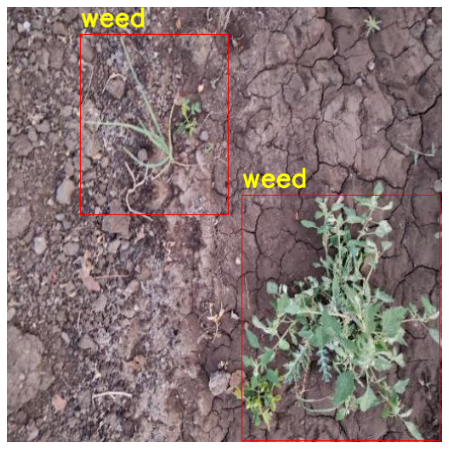

In [15]:
any_index_number = 55 #change this number for different images
test_img = cv2.cvtColor(cv2.imread(path+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

# Saving label file

In [16]:

pascal_voc.to_csv('agri_data.csv',index=False)

In [18]:
import shutil
agri_data_images = 'agri_data_images'
os.mkdir(agri_data_images)



In [19]:

    
    # create a path to the folder

    # create a list of all files in the folder
    file_list = os.listdir(path)

    # move the 0 images to all_images_dir
    for fname in file_list:
        if fname.endswith(".jpeg"):
            src = os.path.join(path, fname)
            dst = os.path.join(agri_data_images, fname)
            shutil.copyfile(src, dst)

In [21]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [22]:

path_images = 'agri_data_images/'

In [23]:
df = pd.read_csv('agri_data.csv')

In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   class     2072 non-null   object
 4   xmin      2072 non-null   int64 
 5   ymin      2072 non-null   int64 
 6   xmax      2072 non-null   int64 
 7   ymax      2072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 129.6+ KB


In [25]:
folder_images = os.listdir(path_images)

In [26]:
len(folder_images)

1300

In [27]:
train_images = folder_images[:1000]

In [28]:
test_images = folder_images[1000:]

In [29]:
j=0
for i in tqdm(list(df['filename'].unique())):
    if i in folder_images:
        j+=1
print(j)

100%|███████████████████████████████████████████████████████████████████████████| 1300/1300 [00:00<00:00, 52138.03it/s]

1300


16it [00:00, 36.62it/s]


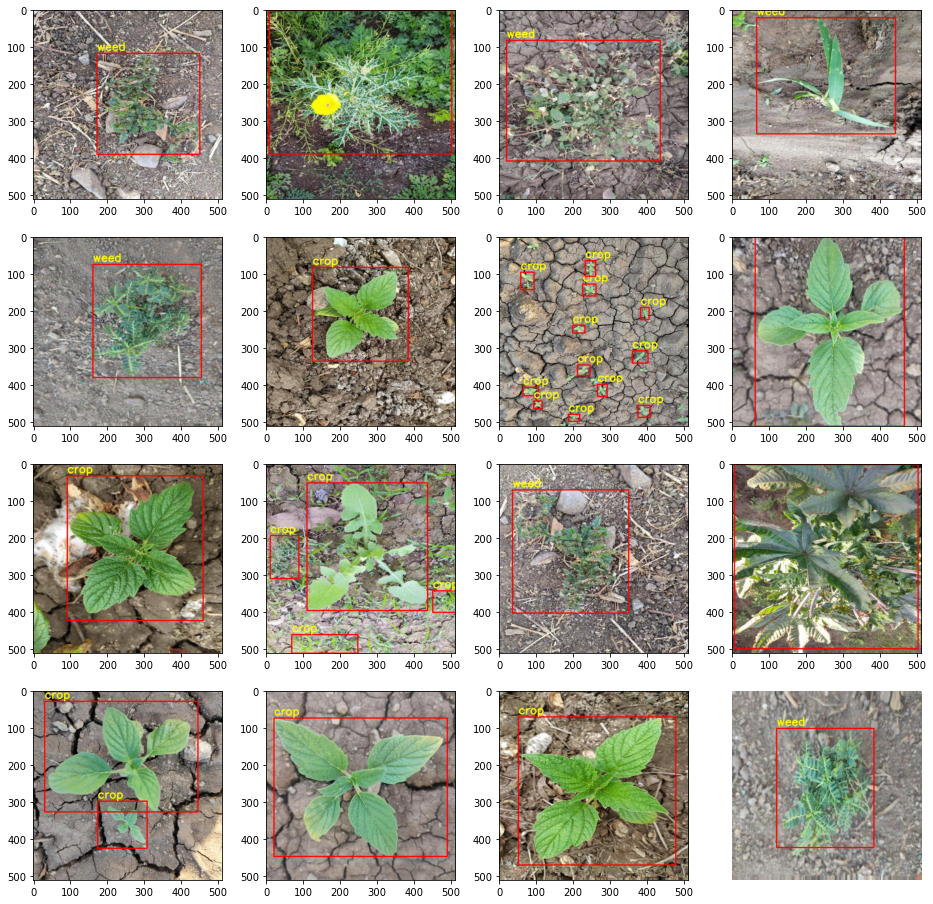

In [30]:
_ , axes = plt.subplots(4,4,figsize=(16,16))
for i,ax in tqdm(zip(range(16),axes.flat)):
    temp_df = df[df['filename']==folder_images[i]].reset_index(drop=True)
    temp_img = cv2.imread(path+folder_images[i])
    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
    for j in range(len(temp_df)):
        rect = cv2.rectangle(temp_img,(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']),(temp_df.loc[j,'xmax'],temp_df.loc[j,'ymax']),(255,0,0),2,cv2.LINE_AA)
        rect_text = cv2.putText(rect,temp_df.loc[j,'class'],(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']-8), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    ax.imshow(rect_text)
    plt.axis('off')

# Selective search


In [31]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [32]:
img = cv2.imread(path+folder_images[45])
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process()


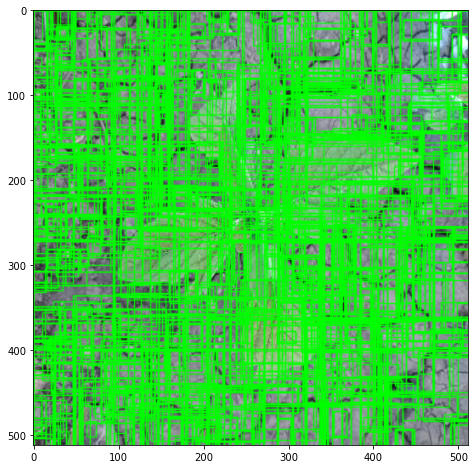

In [33]:
sel_rects = rects[:1200]
imOut = img.copy()
for i, rect in (enumerate(sel_rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure(figsize=(8,8))
plt.imshow(imOut)



In [34]:
import pandas as pd
import numpy as np
import cv2


#cv2.setUseOptimized(True);
#ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()


def iou_filter(image_path,true_bb,thresh=0.5):
    
    cv2.setUseOptimized(True)
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    
    '''
    arguments:
    1. image_path: path of images 
    2. true_bb: true labeled dataframe of image columns = ['filename','width','height','class','xmin','ymin','xmax','ymax']
    3. thresh: threshhold value for intersection over union(iou), by default 0.5
    
    returns:
    filtered_selective_search: rigion which iou is higher than threshhold value of given image and class of that object
    negative_example         : return region which iou is less than thresh value and not conflict with other object region
    
    '''
    
    img_name = image_path.split('/')[-1]
    
    img_bb = true_bb[true_bb['filename']==img_name].reset_index(drop=True)
    
    img = cv2.imread(image_path)
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    
    ss_bb = rects[:2000]
    
    filtered_selective_search = []

    negative_examples = []
    
    maybe_neagative = []
    
    # loop to compute iou for all label of perticular image
    for label in range(len(img_bb)):
        

        #unpacking cordinates
        true_xmin, true_ymin, true_width, true_height  = img_bb.loc[label,'xmin'], img_bb.loc[label,'ymin'], img_bb.loc[label,'xmax']-img_bb.loc[label,'xmin'], img_bb.loc[label,'ymax']-img_bb.loc[label,'ymin']
        class_of_label = img_bb.loc[label,'class']
        
        #loop to compute iou for all selective search of perticular label
        for j,rect in enumerate(ss_bb):
            calculating_iou_for_selectivesearch = iou_calc([true_xmin, true_ymin, true_width, true_height],rect)
            
            if calculating_iou_for_selectivesearch > thresh:
                filtered_selective_search.append([list(rect),class_of_label])
            
            elif calculating_iou_for_selectivesearch <0.2:
                maybe_neagative.append(list(rect))
    
    #removing duplicate entries
    
    def Remove(duplicate): 
        final_list = [] 
        for num in duplicate: 
            if num not in final_list: 
                final_list.append(num) 
        return final_list 

    maybe_neagative = Remove(maybe_neagative)
    filtered_selective_search = Remove(filtered_selective_search)
   

    #this is will use for background class for CNN which has iou less than 0.2, In paper it's 0.3 but in that also written that it's depends on dataset. 

    only_labels_of_filtered_selective_search = [x[0] for x in filtered_selective_search]

    for lab in maybe_neagative:
        condition = []    
        for true_lab in only_labels_of_filtered_selective_search:
            
            iou_for_negative_ex = iou_calc(true_lab,lab)
            
            condition.append(True) if iou_for_negative_ex <= 0.2  else condition.append(False)

        if False not in condition:
            negative_examples.append(lab)
    
    negative_examples = Remove(negative_examples)
    random_background_images_index = np.random.randint(low=0, high=len(negative_examples), size=2*len(only_labels_of_filtered_selective_search)) 
    random_background_images = [negative_examples[x] for x in random_background_images_index]

    
    return filtered_selective_search , Remove(random_background_images)

In [35]:
import numpy as np



def iou_calc(true_bbox , selectivesarch_bbox):
    '''
    true_bbox           : true bounding box  
    selectivesarch_bbox : bounding box output from selective search algorithm
    
    '''
  
    true_xmin, true_ymin, true_width, true_height  = true_bbox
    bb_xmin, bb_ymin,  bb_width, bb_height = selectivesarch_bbox

    true_xmax = true_xmin + true_width
    true_ymax = true_ymin + true_height
    bb_xmax = bb_xmin + bb_width
    bb_ymax = bb_ymin + bb_height

    #calculating area
    true_area = true_width * true_height
    bb_area   = bb_width * bb_height 

    #calculating itersection cordinates
    inter_xmin = max(true_xmin , bb_xmin) 
    inter_ymin = max(true_ymin , bb_ymin)
    inter_xmax = min(true_xmax , bb_xmax)
    inter_ymax = min(true_ymax , bb_ymax)

    if inter_xmax <= inter_xmin or inter_ymax <= inter_ymin:
        iou = 0


    else:
        inter_area = (inter_xmax - inter_xmin) * (inter_ymax - inter_ymin)


        iou = inter_area / (true_area + bb_area - inter_area)
        
    assert iou<=1
    assert iou>=0
    
    return iou

In [36]:
ss,neg =iou_filter(path+folder_images[1280],df,thresh=0.5)

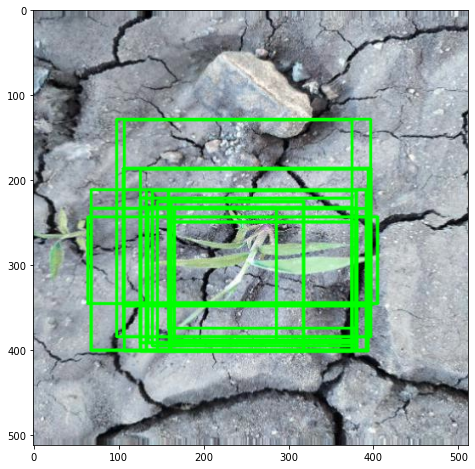

In [37]:

img = cv2.imread(path+folder_images[1280])
for i, rect in (enumerate(ss)):
    x, y, w, h = rect[0]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(12,8))
plt.imshow(img)

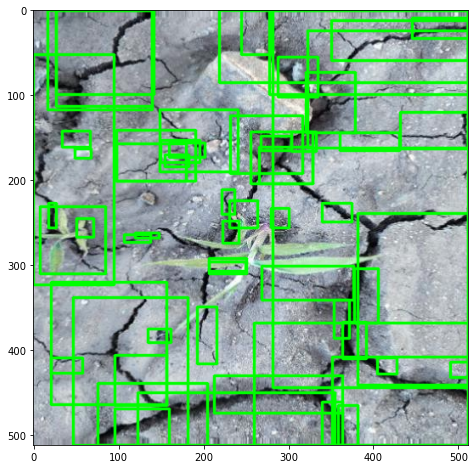

In [38]:
img = cv2.imread(path+folder_images[1280])
for i, rect in (enumerate(neg)):
    x, y, w, h = rect
    
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
    
    
plt.figure(figsize=(12,8))
plt.imshow(img)

In [39]:
len(ss)

31

In [40]:
len(neg)

61

In [41]:

train_data = {}
test_data  = {}

In [42]:
for i,img in tqdm(enumerate(train_images)):
    ss,neg =iou_filter(path + img , df , thresh=0.5)
    train_data[img] = {'region_proposal':ss,'negative_example':neg}

1000it [1:27:27,  5.25s/it]


In [ ]:

for i,img in tqdm(enumerate(test_images)):
    ss,neg =iou_filter(path + img , df , thresh=0.5)
    test_data[img] = {'region_proposal':ss,'negative_example':neg}

158it [11:54,  5.47s/it]

In [ ]:
import json
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [ ]:
with open('train.json','w+') as output_file:
    json.dump(train_data,output_file,cls=MyEncoder)

In [ ]:

with open('test.json','w+') as output_file:
    json.dump(test_data,output_file,cls=MyEncoder)

In [ ]:
with open('train.json') as train:
    train_json = json.load(train)

In [ ]:
with open('test.json') as test:
    test_json = json.load(test)

In [ ]:
train_json == train_data

In [ ]:
test_json == test_data

In [ ]:
!pip3 uninstall tensorflow keras tensorflow-gpu --yes

# Data Processing RCNN Part 2

In [ ]:
!pip3 install --upgrade pip
!pip3 install --upgrade tensorflow 
!pip3 install keras
!pip3 install --upgrade tensorflow-gpu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
#import keras
import os
from tqdm import tqdm
import json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_json = 'train.json'
test_json = 'test.json'
images_path = 'agri_data_images/'

In [ ]:
with open(train_json,'r') as train:
    train_data = json.load(train)

In [ ]:
with open(test_json,'r') as test:
    test_data = json.load(test)

In [ ]:
train_images_list = list(train_data.keys())
test_images_list =list(test_data.keys())

# Creating Folder

In [ ]:
os.mkdir('Train')
os.mkdir('Test')

In [ ]:
os.mkdir('Train/weed')
os.mkdir('Train/crop')
os.mkdir('Train/background')

os.mkdir('Test/weed')
os.mkdir('Test/crop')
os.mkdir('Test/background')

In [ ]:
#For Training
for count,img_id in tqdm(enumerate(train_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in train_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) +'.jpeg',temp_img)
        
    
    for background in train_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) + '.jpeg',temp_img)

In [ ]:
#For Testing
for count,img_id in tqdm(enumerate(test_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in test_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) +'.jpeg',temp_img)
        
    
    for background in test_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) + '.jpeg',temp_img)

In [ ]:
print('Total training weed images are {}'.format(len(os.listdir('Train/weed'))))
print('Total training crop images are {}'.format(len(os.listdir('Train/crop'))))
print('Total training background images are {}'.format(len(os.listdir('Train/background'))))

In [ ]:
print('Total testing weed images are {}'.format(len(os.listdir('Test/weed'))))
print('Total testing crop images are {}'.format(len(os.listdir('Test/crop'))))
print('Total testing background images are {}'.format(len(os.listdir('Test/background'))))

In [ ]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/background')[:16]):
    plt.subplot(4,4,i+1)
    plt.title('background')
    img = cv2.imread('Train/background/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/crop')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('crop')
    img = cv2.imread('Train/crop/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
plt.figure(figsize=(15,12))

for i,img in enumerate(os.listdir('Train/weed')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('weed')
    img = cv2.imread('Train/weed/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.show() 

# Training of model

# CNN finetuning

In [ ]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy

In [ ]:
!pip3 install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
train_path = 'Train/'
test_path = 'Test/'

In [ ]:
# Preparing Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = (224,224,3)

In [ ]:
train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 subset='training')

val_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=False,
                                                 subset='validation')

test_generator  = ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",shuffle=False,
                                                 batch_size=BATCH_SIZE)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Model Architecture

In [ ]:


baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=IMAGE_SIZE))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(4096, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4096, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation='softmax')(headModel)

for layer in baseModel.layers:
    layer.trainable = False

model = Model(inputs=baseModel.input, outputs=headModel)

opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(patience=2,monitor='val_loss')

In [ ]:
#results = model.fit_generator(train_data,epochs=1,
#                              validation_data=val_data,steps_per_epoch = 5,
#                            callbacks=[early_stop])

results = model.fit_generator(train_data,epochs=3,
                              validation_data=val_data)

<AxesSubplot:>

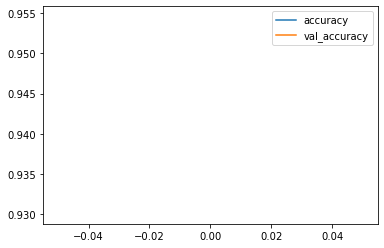

In [78]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

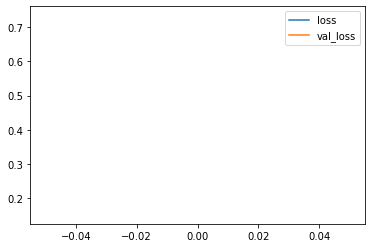

In [79]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [80]:
test_pred = model.predict_generator(test_data)

In [81]:
pred_class = [np.argmax(x) for x in test_pred]

In [82]:
test_data.class_indices

{'background': 0, 'crop': 1, 'weed': 2}

In [83]:
true_class = test_data.classes

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
print(classification_report(true_class,pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10778
           1       0.97      0.94      0.96      3147
           2       0.96      0.91      0.93      2331

    accuracy                           0.97     16256
   macro avg       0.97      0.95      0.96     16256
weighted avg       0.97      0.97      0.97     16256



<AxesSubplot:>

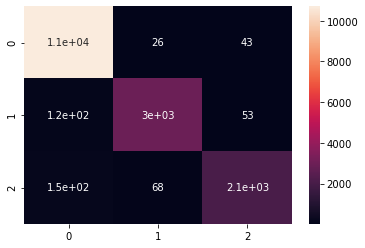

In [87]:
sns.heatmap(confusion_matrix(true_class,pred_class),annot=True)

# Predict on some images

In [88]:
mapping_class = test_data.class_indices

In [89]:
mapping_class = dict([(value, key) for key, value in mapping_class.items()])

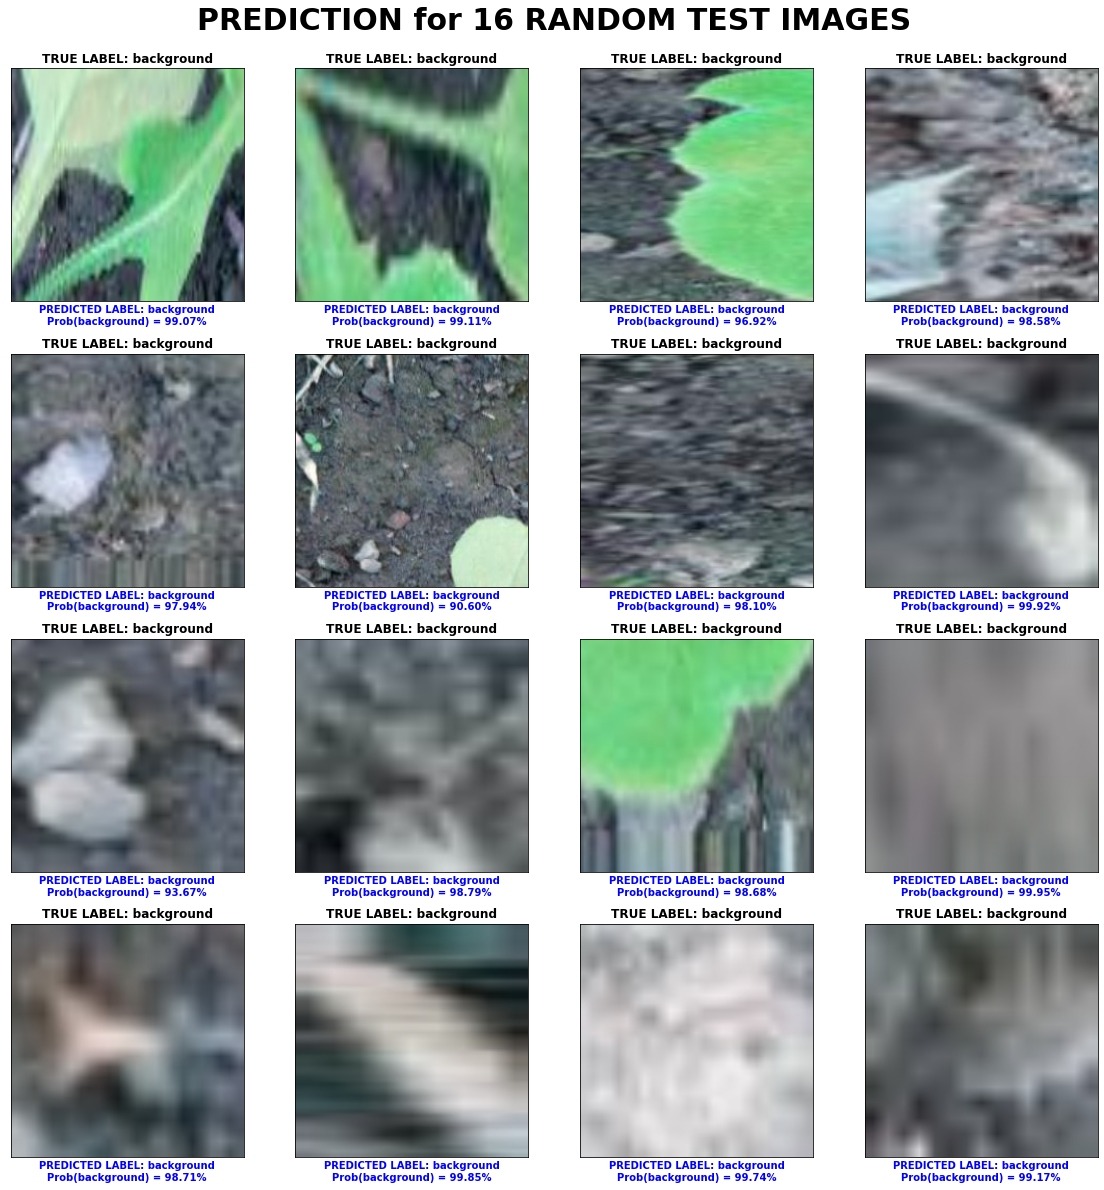

In [91]:
images, labels = next(iter(test_data))
images = images.reshape(256, 224,224,3)
fig, axes = plt.subplots(4, 4, figsize=(16,16))

for ax, img, label in zip(axes.flat, images[:16], labels[:16]):
    ax.imshow(img)
    true_label = mapping_class[np.argmax(label)]
    
    pred_prob = model.predict(img.reshape(1, 224,224, 3))
    pred_label = mapping_class[np.argmax(pred_prob)]
    
    prob_class = np.max(pred_prob) * 100
    
    ax.set_title(f"TRUE LABEL: {true_label}", fontweight = "bold", fontsize = 12)
    ax.set_xlabel(f"PREDICTED LABEL: {pred_label}\nProb({pred_label}) = {(prob_class):.2f}%",
                 fontweight = "bold", fontsize = 10,
                 color = "blue" if true_label == pred_label else "red")
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
fig.suptitle("PREDICTION for 16 RANDOM TEST IMAGES", size = 30, y = 1.03, fontweight = "bold")
plt.show()

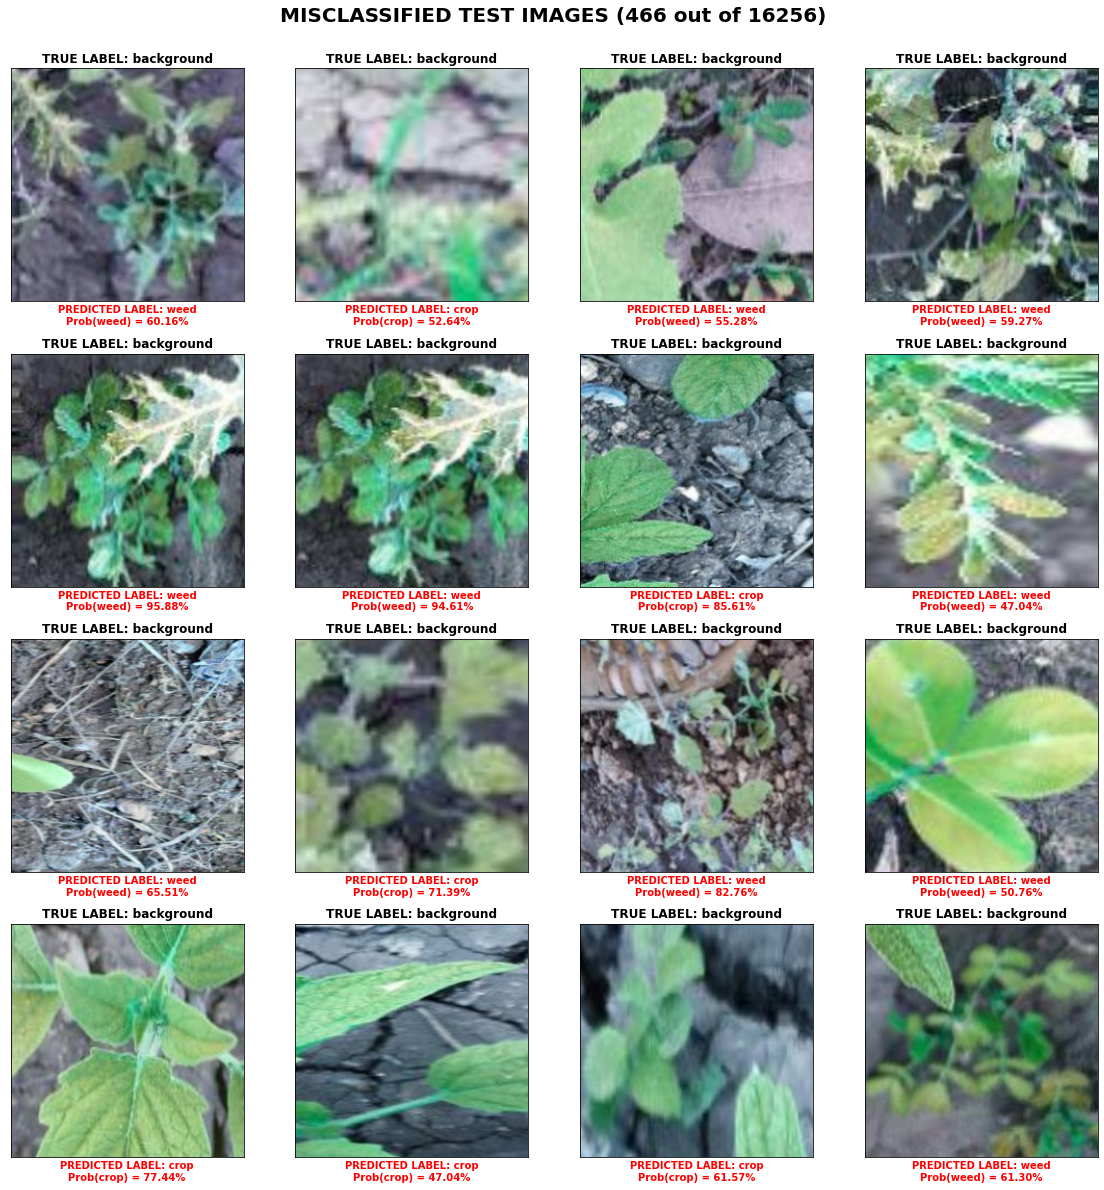

In [92]:
# Misclassified Images

misclassify_pred = np.nonzero(true_class != pred_class)[0]
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for ax, batch_num, image_num in zip(axes.flat, misclassify_pred // BATCH_SIZE, misclassify_pred % BATCH_SIZE):
    images, labels = test_data[batch_num]
    img = images[image_num]
    ax.imshow(img.reshape(*IMAGE_SIZE))
    
    true_label = mapping_class[np.argmax(label)]
    
    pred_prob = model.predict(img.reshape(1, 224,224, 3))
    pred_label = mapping_class[np.argmax(pred_prob)]
    
    prob_class = np.max(pred_prob)*100
    
    
    ax.set_title(f"TRUE LABEL: {true_label}", fontweight = "bold", fontsize = 12)
    ax.set_xlabel(f"PREDICTED LABEL: {pred_label}\nProb({pred_label}) = {(prob_class):.2f}%",
                 fontweight = "bold", fontsize = 10,
                 color = "blue" if true_label == pred_label else "red")
    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
fig.suptitle(f"MISCLASSIFIED TEST IMAGES ({len(misclassify_pred)} out of {len(true_class)})",
             size = 20, y = 1.03, fontweight = "bold")
plt.show()

In [93]:
#Save the Model
model.save('RCNN_crop_weed_classification_model.h5')

# Training Model Part 2

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [95]:
train_json = 'train.json'
test_json = 'test.json'
images_path = 'agri_data_images/'
model_path  = 'RCNN_crop_weed_classification_model.h5'
label_csv = 'agri_data.csv'
negative_ex_path = 'Train/background/'

In [96]:
#Loading pre generated region proposals and Negative examples

with open(train_json,'r') as train:
    train_region = json.load(train)


In [97]:
with open(test_json,'r') as test:
    test_region = json.load(test)

In [98]:
train_images_list = list(train_region.keys())
test_images_list = list(test_region.keys())

In [99]:
print(len(train_images_list))
print(len(test_images_list))

1000
300


In [100]:
labels = pd.read_csv(label_csv)
labels.head()

filename  width  height class  xmin  ymin  xmax  ymax
0  agri_0_1009.jpeg    512     512  weed   172   119   449   391
1  agri_0_1017.jpeg    512     512  weed     8     4   500   390
2  agri_0_1018.jpeg    512     512  weed    20    84   434   409
3  agri_0_1020.jpeg    512     512  weed    66    23   440   336
4  agri_0_1024.jpeg    512     512  weed   161    76   453   381

In [101]:
# Load Pretrained CNN Model

model = tf.keras.models.load_model(model_path)

In [102]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [103]:
# loading model without last two Fully connected layers

In [104]:
model_without_last_2FC = tf.keras.models.Model(model.inputs,model.layers[-5].output)

In [105]:
model_without_last_2FC.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [106]:
# Extracting features from ground truth labeled images

In [107]:
train_features = []
test_features = []


for index in tqdm(range(len(labels))):
    id = labels.loc[index,'filename']
    img = cv2.imread(images_path + id)
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    xmin,ymin,xmax,ymax = int(labels.loc[index,'xmin']) ,int(labels.loc[index,'ymin']),int(labels.loc[index,'xmax']),int(labels.loc[index,'ymax'])

    resized = cv2.resize(rgb_img[ymin:ymax,xmin:xmax,:],(224,224))

    feature_of_img = model_without_last_2FC.predict(resized.reshape(1,224,224,3)/255)
    
    if id in train_images_list:
        
        train_features.append([feature_of_img,labels.loc[index,'class']])
        
    else:
        test_features.append([feature_of_img,labels.loc[index,'class']])

100%|██████████████████████████████████████████████████████████████████████████████| 2072/2072 [06:20<00:00,  5.45it/s]


In [108]:
print(len(train_features))

print(len(test_features))

1637
435


In [109]:
# Extracting Features from Negative images (background)

for index,img in tqdm(enumerate(os.listdir(negative_ex_path)[:5000])):  #only extracting for 10,000 images
    img = cv2.imread(negative_ex_path + img )
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #images already in (224,224,3)
    feature_of_img = model_without_last_2FC.predict(rgb.reshape(1,224,224,3)/255)
    if index<3500:
        train_features.append([feature_of_img,'background'])
    else:
        test_features.append([feature_of_img,'background'])

5000it [15:47,  5.28it/s]


In [110]:
# Prepare data for SVM
import random
random.shuffle(train_features)

In [111]:
X_train = np.array([x[0] for x in train_features])
X_train = X_train.reshape(-1,4096)

In [112]:
X_train.shape

(5137, 4096)

In [113]:
y_train = [x[1] for x in train_features]
y_train = np.array(y_train).reshape(-1,1)

In [114]:
y_train.shape

(5137, 1)

In [115]:
X_test = np.array([x[0] for x in test_features])
X_test = X_test.reshape(-1,4096)

In [116]:
y_test = [x[1] for x in test_features]
y_test = np.array(y_test).reshape(-1,1)

# SVM Training

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [118]:
svm_model_linear = SVC(kernel = 'linear', C = 1,probability=True).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)

In [119]:
accuracy = svm_model_linear.score(X_test, y_test)

In [120]:
accuracy

0.958656330749354

In [121]:
cm = confusion_matrix(y_test, svm_predictions) 

<AxesSubplot:>

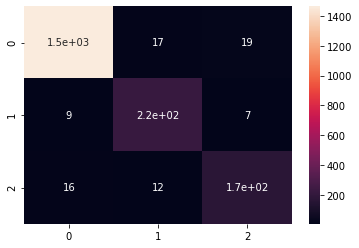

In [122]:
sns.heatmap(cm,annot=True)

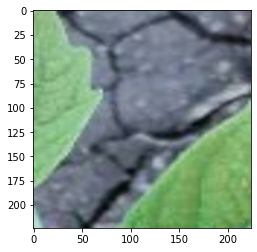

In [123]:
#Check on some images
img = cv2.imread(negative_ex_path + os.listdir(negative_ex_path)[45] )
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [124]:
feature_of_img = model_without_last_2FC.predict(rgb.reshape(1,224,224,3)/255)

In [125]:
svm_model_linear.predict(feature_of_img)

array(['background'], dtype='<U10')

In [126]:
svm_model_linear.predict_proba(feature_of_img)

array([[9.99994605e-01, 2.99298727e-06, 2.40216290e-06]])

In [127]:
svm_model_linear.classes_

array(['background', 'crop', 'weed'], dtype='<U10')

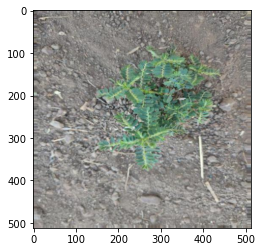

In [128]:
img = cv2.imread(images_path+'agri_0_1024.jpeg')
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [129]:
resized = cv2.resize(rgb,(224,224))

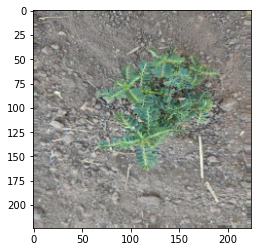

In [130]:
plt.imshow(resized)

In [131]:
svm_model_linear.predict_proba(model_without_last_2FC.predict(resized.reshape(1,224,224,3)/255))

array([[0.0651961 , 0.24408608, 0.69071782]])

# Saving SVM Model

In [132]:
import pickle

with open('svm_classifier.pkl','wb') as svm_model:
    pickle.dump(svm_model_linear , svm_model)